# Assignment 3
## Austin Peng
## CSC 241
--------------------


Contents
------------------
- Part A
- Part B
- Part C
- Part D

# Part A
____

In [2]:
# IMPORTS
%matplotlib inline
import numpy as np
import math, sys
from pylab import *
style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = [20, 8]

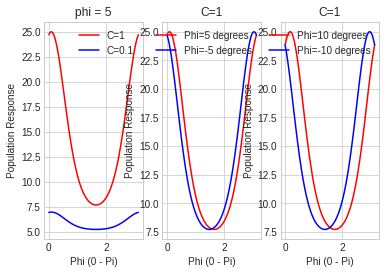

In [3]:
#1
n=100
k=1
f_max=20
f0=5

# method for pop. response f(c, phi) 
# THIS FUNCTION TAKES phi_I AS INPUT TO GENERATE VALUES FOR A SET phi OVER 0 TO PI
def population_response(c, phi_I):
    response = f0 + c* f_max * math.exp(k *( math.cos(2*(math.radians(phi) - phi_I)) - 1) )
    return response

# range
plot_range = np.linspace(0, math.pi, n)

# find responses for c values at phi=-5
phi = 5
c1 = []
c01 = []
for x in plot_range:
    c1.append(population_response(1, x))
    
for x in plot_range:
    c01.append(population_response(0.1, x))

subplot(1, 3, 1)
title("phi = 5")
xlabel("Phi (0 - Pi)")
ylabel("Population Response")
plot(plot_range, c1, 'r', label='C=1')
plot(plot_range, c01, 'b', label='C=0.1')
legend(loc='upper right')

    
# find responses for c values at phi=5
phi = 5
phi_5 = []
phi_neg5 = []
for x in plot_range:
    phi_5.append(population_response(1, x))

phi=-5
for x in plot_range:
    phi_neg5.append(population_response(1, x))


subplot(1, 3, 2)
title("C=1")
xlabel("Phi (0 - Pi)")
ylabel("Population Response")
plot(plot_range, phi_5, 'r', label='Phi=5 degrees')
plot(plot_range, phi_neg5, 'b', label='Phi=-5 degrees')
legend(loc='upper right')


# find responses for c values at phi=10
phi = 10
phi_10 = []
phi_neg10 = []
for x in plot_range:
    phi_10.append(population_response(1, x))

phi=-10
for x in plot_range:
    phi_neg10.append(population_response(1, x))

subplot(1, 3, 3)
title("C=1")
xlabel("Phi (0 - Pi)")
ylabel("Population Response")
plot(plot_range, phi_10, 'r', label='Phi=10 degrees')
plot(plot_range, phi_neg10, 'b', label='Phi=-10 degrees')
legend(loc='upper right')


show()

C determines the height or strength of the population response.
As phi increases, the response curves shift towards the right. Phi affects the popluation responses horizontal orientation.

In [4]:
#2
# Need to create a 100x100 matrix with diagonal as f(c, phi) where c = 1 and phi goes from range (0 to pi) over 100 increments
# This is a sample of 100 neurons

C= np.zeros((100,100), dtype=float)
phi=0
count=0
for x in plot_range:
    C[count][count] = population_response(1,x) 
    count+=1
print(C)

[[25.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         24.95977404  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         24.83974177 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 24.83974177  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         24.95977404
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  25.        ]]


In [5]:
# C = 100x100 matrix from #2 but inverse
C_inverse=[]
for x in range(0,100):
    C_inverse.append(C[x] / (C[x][x]**2))
    
# convert back to np array
C_inverse = np.asarray(C_inverse)
print(C_inverse)

[[0.04       0.         0.         ... 0.         0.         0.        ]
 [0.         0.04006447 0.         ... 0.         0.         0.        ]
 [0.         0.         0.04025807 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04025807 0.         0.        ]
 [0.         0.         0.         ... 0.         0.04006447 0.        ]
 [0.         0.         0.         ... 0.         0.         0.04      ]]


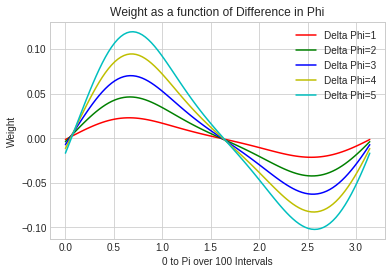

In [6]:
#3
# W (100x1) = C-1 (100x100) * ( f1 (100x1) - f2 (100x1))
# Make the difference b/w phi and phi2 go from 0 to 10
# phi_i is still 0 to Pi. 

# this is f2 which is 100x1 and is constant, f1 changes to represent delta phi
phi = 1
f2=[]
for y in plot_range:
    f2.append(population_response(1, y))
f2 = np.asarray(f2)    
    
# phi for f1 will go from 2 to 6
delta_phi = list(range(2,7))

# generate the weights
w = []
for x in delta_phi:
    phi=x
    
    # this will generate f1 which is 100x1
    f1=[]
    for y in plot_range:
        f1.append(population_response(1, y))
    f1 = np.asarray(f1)    
    
    diff = f1-f2
    w.append( np.matmul(C_inverse, diff) ) 

w=np.asarray(w)
    
    
title("Weight as a function of Difference in Phi")
xlabel("0 to Pi over 100 Intervals")
ylabel("Weight")
plot(plot_range, w[0], 'r', label='Delta Phi=1')
plot(plot_range, w[1], 'g', label='Delta Phi=2')
plot(plot_range, w[2], 'b', label='Delta Phi=3')
plot(plot_range, w[3], 'y', label='Delta Phi=4')
plot(plot_range, w[4], 'c', label='Delta Phi=5')
legend(loc='upper right')
show()

Weight values increases as Delta Phi increases.

In [11]:
#4
# W from question 3. R is poissonrnd( f(c,phi) ) use phi1 used from #3
# W is 100x1 and R is 100x1
# Since I have 4 w's and 4 r's I will have 3 decision variables.

# here I am generating the w's and r's
f1_list=[]
for x in delta_phi:
    phi=x
    
    # this will generate f1 which is 100x1
    f1=[]
    for y in plot_range:
        f1.append(population_response(1, y))
    f1 = np.asarray(f1)
    f1_list.append(f1)

    
r_list=[]
for x in range(0,5):
    r_list.append(np.random.poisson(f1_list[x]))

w_list=[]
for x in range(0,5):
    w_list.append(w[x].transpose())

    
# create 5 decision variables
d_list=[]
for x in range(0,5):
    d_list.append(np.matmul(w_list[x], r_list[x]))

print("decision variables: ", d_list)

decision variables:  [0.647429279574191, 0.9913758863166366, 3.8830176015033113, 5.4988264767039166, 7.053148171365197]


The decision-maker made the right decision  869  times.


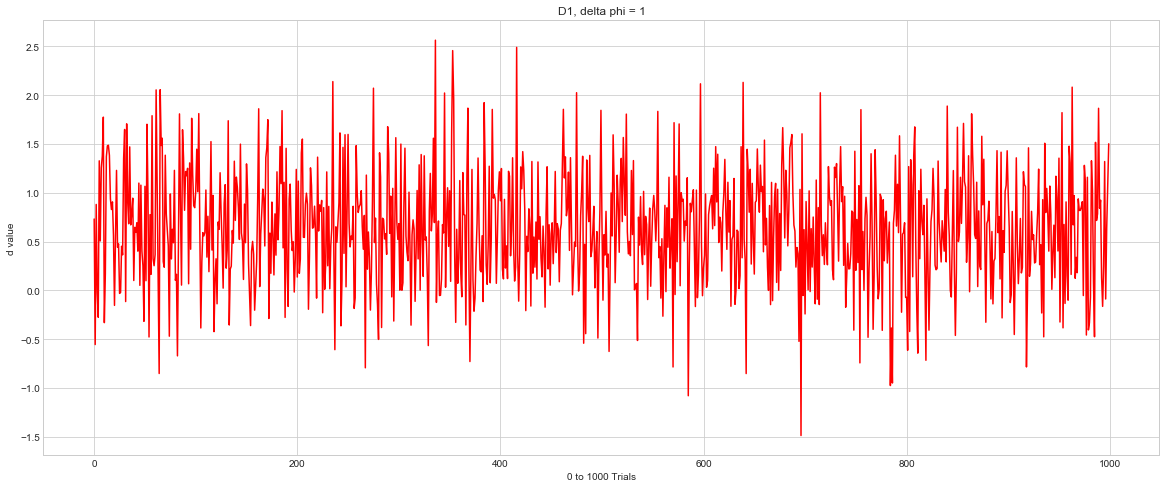

In [41]:
#5
# d1 is 1000 trials of d from #4 where r is different each time
# d1 = 1000x1 for 5 degrees
# d2 = 1000x1 for -5 degrees
# correct decision is if d1 > 0 or positive


# I'm using w[1] and f1_list[1] where the delta phi was 1
d1=[]
right_decision=0
part_5_range= list(range(0,1000,1))

for x in part_5_range:
    # Matrix Multiplication
    d = np.matmul(w[0], np.random.poisson(f1_list[0]))
    # How often was d>0?
    if(d>0):
        right_decision+=1
    d1.append(d)

print("The decision-maker made the right decision ", right_decision, " times.")

title("D1, delta phi = 1")
xlabel("0 to 1000 Trials")
ylabel("d value")
plot(part_5_range, d1, 'r')
show()

The decision-maker made the right decision  981  times.


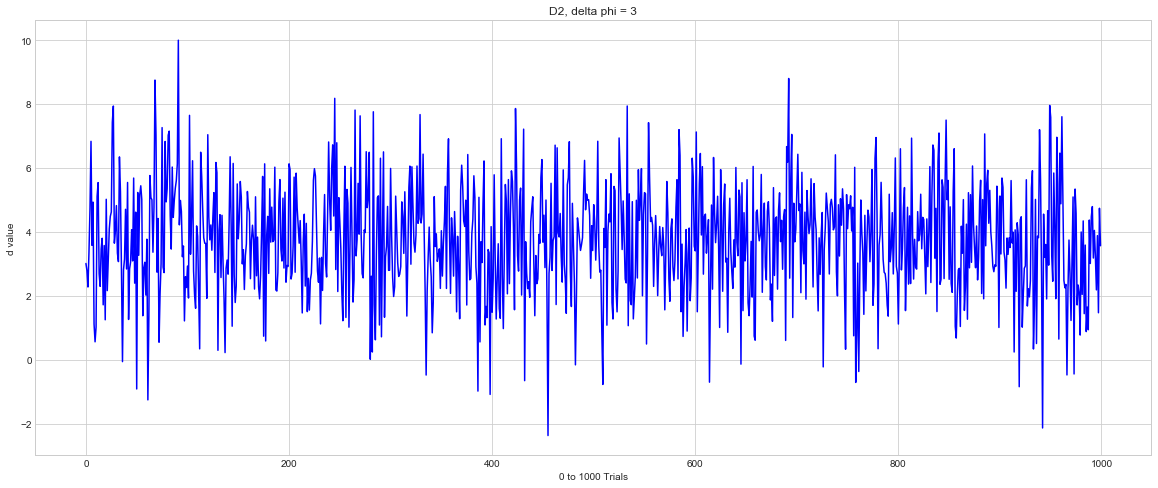

In [42]:
# I'm using w[2] and f1_list[2] where the delta phi was 3
d2=[]
right_decision=0
part_5_range= list(range(0,1000,1))

for x in part_5_range:
    d = np.matmul(w[2], np.random.poisson(f1_list[2]))
    # How often was d>0?
    if(d>0):
        right_decision+=1
    d2.append(d)

print("The decision-maker made the right decision ", right_decision, " times.")


title("D2, delta phi = 3")
xlabel("0 to 1000 Trials")
ylabel("d value")
plot(part_5_range, d2, 'b')
show()

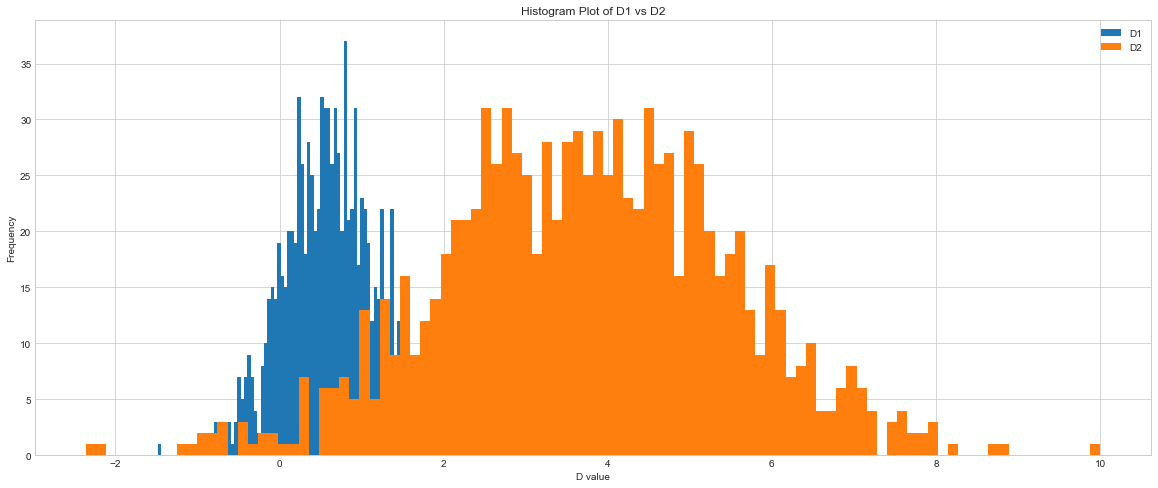

In [43]:
title("Histogram Plot of D1 vs D2")
xlabel("D value")
ylabel("Frequency")
plt.hist(d1, bins=100, label="D1")
plt.hist(d2, bins=100, label="D2")
legend(loc='upper right')
show()


In [44]:
# d' = a single result, average the positive results from d1 and d2
def dprime():
    ans = ( mean(d2) - mean(d1)) / math.sqrt(var(d1) + var(d2))
    return ans

print(dprime())

1.6860707047176648


In [45]:
#6
# n change means change from 2x2 ... 1000x10000 covariance matrix neuron sample
# Combine Everything!
# to plot d' by n, need to recalculate: f(c, phi) -> C -> weights -> d -> d'

dprime_list_a=[]

for n in range(2, 1000):
    plot_range = np.linspace(0, math.pi, n)


    ############################# C
    C= np.zeros((n,n), dtype=float)
    phi=0
    count=0
    for x in plot_range:
        C[count][count] = population_response(1,x) 
        count+=1

    C_inverse=[]
    for x in range(0,n):
        C_inverse.append(C[x] / (C[x][x]**2))

    # convert back to np array
    C_inverse = np.asarray(C_inverse)


    ############################# w
    # find weight variables, but only need one

    # this is f2 which is 100x1 and is constant, f1 changes to represent delta phi
    phi = 1
    f2=[]
    for y in plot_range:
        f2.append(population_response(1, y))
    f2 = np.asarray(f2)    

    # phi for f1 will go from 2 to 6
    delta_phi = list(range(2,7))

    # generate the weights
    w = []
    for x in delta_phi:
        phi=x

        # this will generate f1 which is 100x1
        f1=[]
        for y in plot_range:
            f1.append(population_response(1, y))
        f1 = np.asarray(f1)    

        diff = f1-f2
        w.append( np.matmul(C_inverse, diff) ) 

    w=np.asarray(w)


    ############################# r

    # here I am generating the w's and r's
    f1_list=[]
    for x in delta_phi:
        phi=x

        # this will generate f1 which is 100x1
        f1=[]
        for y in plot_range:
            f1.append(population_response(1, y))
        f1 = np.asarray(f1)
        f1_list.append(f1)

    r_list=[]
    for x in range(0,5):
        r_list.append(np.random.poisson(f1_list[x]))

    w_list=[]
    for x in range(0,5):
        w_list.append(w[x].transpose())


    # create 5 decision variables
    d_list=[]
    for x in range(0,5):
        d_list.append(np.matmul(w_list[x], r_list[x]))



    ############################# generate the two d valules

    # I'm using w[1] and f1_list[1] where the delta phi was 1
    d1=[]
    right_decision=0
    part_5_range= list(range(0,1000,1))

    for x in part_5_range:
        d = np.matmul(w[0], np.random.poisson(f1_list[0]))
        # How often was d>0?
        if(d>0):
            right_decision+=1
        d1.append(d)


    # I'm using w[2] and f1_list[2] where the delta phi was 3
    d2=[]
    right_decision=0
    part_5_range= list(range(0,1000,1))

    for x in part_5_range:
        d = np.matmul(w[2], np.random.poisson(f1_list[2]))
        # How often was d>0?
        if(d>0):
            right_decision+=1
        d2.append(d)



    ############################# find d' and save it to plot over 2 to 1000
    # d' = a single result, average the positive results from d1 and d2
    def dprime():
        ans = ( mean(d2) - mean(d1)) / math.sqrt(var(d1) + var(d2))
        return ans

    dprime_list_a.append(dprime())


print("Dprime List Filled! Size: ", len(dprime_list_a))


Dprime List Filled! Size:  998


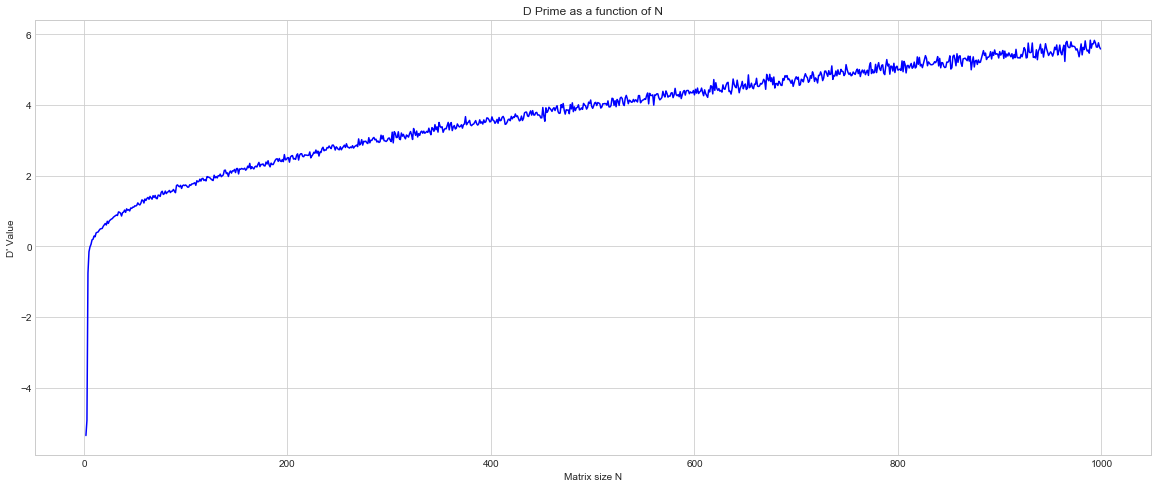

In [46]:
# 6 Plot

title("D Prime as a function of N")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_a, 'b')
show()


In [47]:
#7
# similar process to before, but now w/ k 

dprime_list_k=[]

# 0.5 to 10 k
k_range = np.asarray(range(5, 105, 5))/10


for k in k_range:
    k = k
    n=100
    plot_range = np.linspace(0, math.pi, n)


    ############################# C
    C= np.zeros((n,n), dtype=float)
    phi=0
    count=0
    for x in plot_range:
        C[count][count] = population_response(1,x) 
        count+=1

    C_inverse=[]
    for x in range(0,n):
        C_inverse.append(C[x] / (C[x][x]**2))

    # convert back to np array
    C_inverse = np.asarray(C_inverse)


    ############################# w
    # find weight variables, but only need one

    # this is f2 which is 100x1 and is constant, f1 changes to represent delta phi
    phi = 1
    f2=[]
    for y in plot_range:
        f2.append(population_response(1, y))
    f2 = np.asarray(f2)    

    # phi for f1 will go from 2 to 6
    delta_phi = list(range(2,7))

    # generate the weights
    w = []
    for x in delta_phi:
        phi=x

        # this will generate f1 which is 100x1
        f1=[]
        for y in plot_range:
            f1.append(population_response(1, y))
        f1 = np.asarray(f1)    

        diff = f1-f2
        w.append( np.matmul(C_inverse, diff) ) 

    w=np.asarray(w)


    ############################# r

    # here I am generating the w's and r's
    f1_list=[]
    for x in delta_phi:
        phi=x

        # this will generate f1 which is 100x1
        f1=[]
        for y in plot_range:
            f1.append(population_response(1, y))
        f1 = np.asarray(f1)
        f1_list.append(f1)

    r_list=[]
    for x in range(0,5):
        r_list.append(np.random.poisson(f1_list[x]))

    w_list=[]
    for x in range(0,5):
        w_list.append(w[x].transpose())


    # create 5 decision variables
    d_list=[]
    for x in range(0,5):
        d_list.append(np.matmul(w_list[x], r_list[x]))



    ############################# generate the two d values

    # I'm using w[1] and f1_list[1] where the delta phi was 1
    d1=[]
    right_decision=0
    part_5_range= list(range(0,1000,1))

    for x in part_5_range:
        d = np.matmul(w[0], np.random.poisson(f1_list[0]))
        # How often was d>0?
        if(d>0):
            right_decision+=1
        d1.append(d)


    # I'm using w[2] and f1_list[2] where the delta phi was 3
    d2=[]
    right_decision=0
    part_5_range= list(range(0,1000,1))

    for x in part_5_range:
        d = np.matmul(w[2], np.random.poisson(f1_list[2]))
        # How often was d>0?
        if(d>0):
            right_decision+=1
        d2.append(d)



    ############################# find d' and save it to plot over 2 to 1000
    # d' = a single result, average the positive results from d1 and d2
    def dprime():
        ans = ( mean(d2) - mean(d1)) / math.sqrt(var(d1) + var(d2))
        return ans

    dprime_list_k.append(dprime())


print("Dprime List Filled! Size:", len(dprime_list_k))



Dprime List Filled! Size: 20


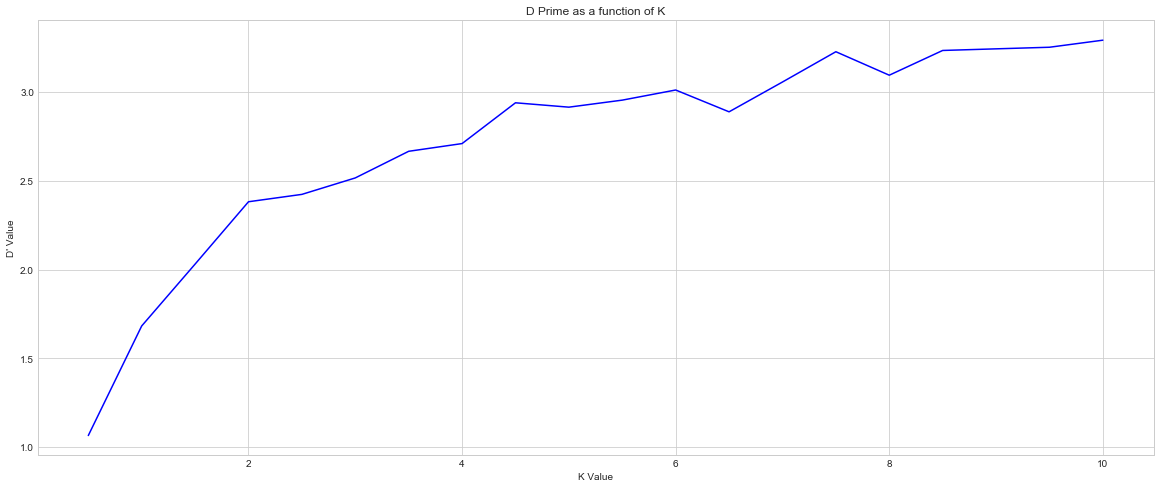

In [48]:
# 7 Plot

title("D Prime as a function of K")
xlabel("K Value")
ylabel("D' Value")
plot(k_range, dprime_list_k, 'b')
show()

# Part B
____

In [2]:
# Reset all values
# IMPORTS
%matplotlib inline
import numpy as np
import math, sys
from pylab import *
from tqdm import tqdm
import time
style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = [20, 8]


n=100
k=1
f_max=20
f0=5
phi=1


# method for pop. response f(c, phi) 
# THIS FUNCTION TAKES phi_I AS INPUT TO GENERATE VALUES FOR A SET phi OVER 0 TO PI
def population_response(c, phi_I):
    response = f0 + c* f_max * math.exp(k *( math.cos(2*(math.radians(phi) - phi_I)) - 1) )
    return response

# range
plot_range = np.linspace(0, math.pi, n)

In [236]:
#1
# Start by generating covariance matrix but its not diagonal

cmax=0.3
tau=0.5
k=1
n=100

# range
plot_range = np.linspace(0, math.pi, n)

# takes phi I and phi J to find little c(ij)
def c(i,j):
    return cmax * math.exp(-abs(i - j)/tau)

# Covariance matrix
C= np.zeros((n,n), dtype=float)

# fill C, i and j correspond to phi_I with c=0 and phi=0
# phi_I ranges from 0 to Pi over n intervals corresponding to each matrix element for both cols and rows

# used for iterating through C
xElement, yElement = 0,0

for x in plot_range:
    yElement=0
    for y in plot_range:
        C[xElement][yElement] =  c(x,y) * math.sqrt( population_response(1,x) * population_response(1,y))
        yElement+=1
        
    xElement+=1
print(C)

[[7.55252204 7.12004986 6.70165902 ... 0.01579561 0.01493719 0.0141039 ]
 [7.12004986 7.62079688 7.17298097 ... 0.0169065  0.01598771 0.01509582]
 [6.70165902 7.17298097 7.66523171 ... 0.01806672 0.01708488 0.01613178]
 ...
 [0.01579561 0.0169065  0.01806672 ... 7.34908722 6.94970063 6.56200239]
 [0.01493719 0.01598771 0.01708488 ... 6.94970063 7.46148224 7.04523359]
 [0.0141039  0.01509582 0.01613178 ... 6.56200239 7.04523359 7.55252204]]


In [235]:
# Create Inverse of C
# use built in matrix function b/c it's harder
C_inverse = np.linalg.inv(C)
print(C_inverse)

[[ 1.11072097e+00 -1.03773776e+00 -2.23440460e-15 ...  7.64147030e-18
  -5.94502964e-18  3.01039511e-18]
 [-1.03773776e+00  2.07032013e+00 -1.03008005e+00 ... -2.11012204e-17
   1.00009474e-17 -1.56790337e-18]
 [-3.42401541e-16 -1.03008005e+00  2.05831862e+00 ...  1.55134980e-17
  -6.90930132e-18 -1.04011107e-18]
 ...
 [ 3.43127428e-18 -1.49510677e-17  1.76526025e-17 ...  2.14686378e+00
  -1.06317451e+00  0.00000000e+00]
 [-2.28150770e-18  5.50955015e-18 -8.75234549e-18 ... -1.06317451e+00
   2.11452479e+00 -1.04875793e+00]
 [ 1.89992156e-18 -2.22038688e-18  1.52371097e-18 ...  0.00000000e+00
  -1.04875793e+00  1.11072097e+00]]


In [53]:
#2 
# Same as A, find Wopt for c=0.1, phi is 1 to stay consistent
# Delta Phi is the same as before
phi=1

f2=[]
for y in plot_range:
    f2.append(population_response(0.1, y))
f2 = np.asarray(f2)    


# phi for f1 will go from 2 to 6
delta_phi = list(range(2,7))

# generate the weights
w = []

# f1_list = population response from phi 2 to 6
f1_list=[]
for x in delta_phi:
    phi=x
    # this will generate f1 which is 100x1
    f1=[]
    for y in plot_range:
        f1.append(population_response(0.1, y))
    f1 = np.asarray(f1)  
    f1_list.append(f1)
    diff = f1-f2
    w.append( np.matmul(C_inverse, diff) ) 
    
w=np.asarray(w)

In [54]:
#3 
# Same as A
# for R, use np.random.multivariate_normal instead  
# this is just for demonstrative purposes, for the (2, 1000) trial r needs to be generated each time

# here I am generating the w's and r's
r_list=[]
for x in range(0,5):
    r_list.append(np.random.multivariate_normal(f1_list[x], C_inverse))

w_list=[]
for x in range(0,5):
    w_list.append(w[x].transpose())

In [55]:
# TEST to find dprime value

# d1 is 1000 trials of d from #4 where r is different each time
# d1 = 1000x1 for 5 degrees
# d2 = 1000x1 for -5 degrees
# correct decision is if d1 > 0 or positive


# I'm using w[1] and f1_list[1] where the delta phi was 1
d1=[]
right_decision=0
part_5_range= list(range(0,1000,1))

for x in part_5_range:
    # Matrix Multiplication
    d = np.matmul(w_list[0], np.random.multivariate_normal(f1_list[0], C_inverse))
    # How often was d>0?
    if(d>0):
        right_decision+=1
    d1.append(d)
    
print("The decision-maker made the right decision ", right_decision, " times.")

The decision-maker made the right decision  423  times.


In [56]:
# TEST to find dprime value

# I'm using w[1] and f1_list[1] where the delta phi was 1
d2=[]
right_decision=0
part_5_range= list(range(0,1000,1))

for x in part_5_range:
    # Matrix Multiplication
    d = np.matmul(w_list[3], np.random.multivariate_normal(f1_list[3], C_inverse))
    # How often was d>0?
    if(d>0):
        right_decision+=1
    d2.append(d)
    
print("The decision-maker made the right decision ", right_decision, " times.")

The decision-maker made the right decision  438  times.


In [57]:
# d' = a single result, average the positive results from d1 and d2
def dprime():
    ans = ( mean(d2) - mean(d1)) / math.sqrt(var(d1) + var(d2))
    return ans

print(dprime())

-0.0838967262733837


In [77]:
# 4 Function Takes too long, need to calculate things beforehand
# I am filling lists with values from nxn matrices here to use later to create d1 and d2
# Also I am only taking 20 n values from 2 to 1000 because actually running through 998 matrices takes way too long.

C_inverse_list=[]
w_list=[]
f1_for_diff_n=[]

for n in range(2, 1000, 50):
    
    
    ################### C and C inverse
    plot_range = np.linspace(0, math.pi, n)
    # Covariance matrix
    C= np.zeros((n,n), dtype=float)
    phi=1

    # used for iterating through C
    xElement, yElement = 0,0

    for x in plot_range:
        yElement=0
        for y in plot_range:
            C[xElement][yElement] =  c(x,y) * math.sqrt( population_response(1,x) * population_response(1,y))
            yElement+=1
        xElement+=1

    C_inverse = np.linalg.inv(C)
    
    
    # STORE
    C_inverse_list.append(C_inverse)
        
    ################### only need w opt for deltaphi of 0 and 3
    f2=[]
    for y in plot_range:
        f2.append(population_response(0.1, y))
    f2 = np.asarray(f2)    
    # phi for f1 will go from 2 to 6
    delta_phi = list(range(2,7))

    # generate the weights
    w = []

    # f1_list = population response from phi 2 to 6
    f1_list=[]

    for x in delta_phi:
        phi=x
        # this will generate f1 which is 100x1
        f1=[]
        for y in plot_range:
            f1.append(population_response(0.1, y))

        f1 = np.asarray(f1)  
        f1_list.append(f1)
        diff = f1-f2
        w.append( np.matmul(C_inverse, diff) ) 
    
    w=np.asarray(w)
    f1_list=np.asarray(f1_list)
    
    # STORE
    f1_for_diff_n.append(f1_list)
    
    # STORE
    w_list.append(w)
      


In [ ]:
#4 
# Plot as a function of n again
# D' tells us how seperated the distributions should be. How good the decision is. The bigger distance between
# the two plots the better
# make it a function so it can be used 3 more times more easily
# same as question A, but C and w opt are updated for part b)
# I'm still plotting from n=2 to n=1000, but with fewer points to save time. The plot will have the same general shape.


def calc_dprime(cmax):
    progress=0
    for n in range(0, 20, 1):
        print(progress, end =" ")
        progress+=1
        ################# Restate Global Functions, some values wouldn't change for some reasons
        cmax=cmax
        tau=0.5
        k=1


        d1=[]
        part_5_range= list(range(0,30))

        for x in part_5_range:
            # Matrix Multiplication
            d = np.matmul(w_list[n][0], np.random.multivariate_normal(f1_for_diff_n[n][0], C_inverse_list[n]))
            d1.append(d)


        ################### D2

        d2=[]

        for x in part_5_range:
            # Matrix Multiplication
            d = np.matmul(w_list[n][3], np.random.multivariate_normal(f1_for_diff_n[n][3], C_inverse_list[n]))
            d2.append(d)

        ################### D'

        def dprime():
            ans = ( mean(d1) - mean(d2)) / math.sqrt(var(d1) + var(d2))
            return ans

        dprime_list_b.append(dprime())


    

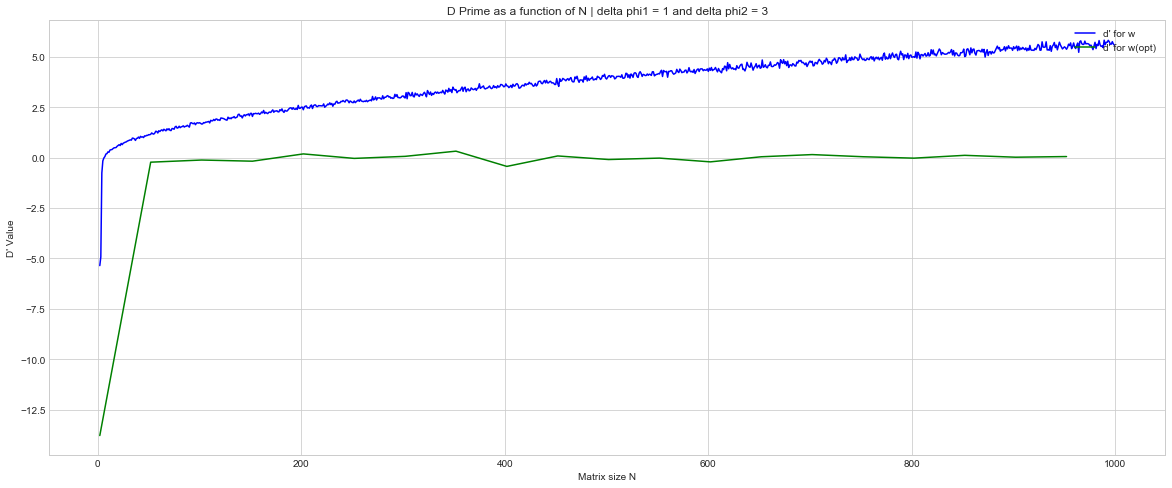

--- 141.16757464408875 seconds ---


In [90]:
import time
start_time = time.time()

dprime_list_b=[]
cmax =0.1
calc_dprime(cmax)
print(dprime_list_b)


title("D Prime as a function of N | w-opt and w")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_a, 'b', label="d' for w")
plot(range(2, 1000, 50), dprime_list_b, 'g', label="d' for w(opt)" )
legend(loc='upper right')
show()

print("--- %s seconds ---" % (time.time() - start_time))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 [-15.895301859383178, 0.034419390604435406, -0.389116811685853, -0.1736986184250438, 0.09890311708268366, 0.08297850471117112, -0.2808928446636336, 0.17241779582354425, 0.3196245592625671, 0.06144959394949059, -0.02643265099738581, -0.049386615314570496, -0.052248749520319354, -0.03457028364937484, -0.008686946126060711, 0.023469010253092937, 0.06076067366466847, -0.17870154965204543, 0.09324969498527105, -0.033222810868936296]


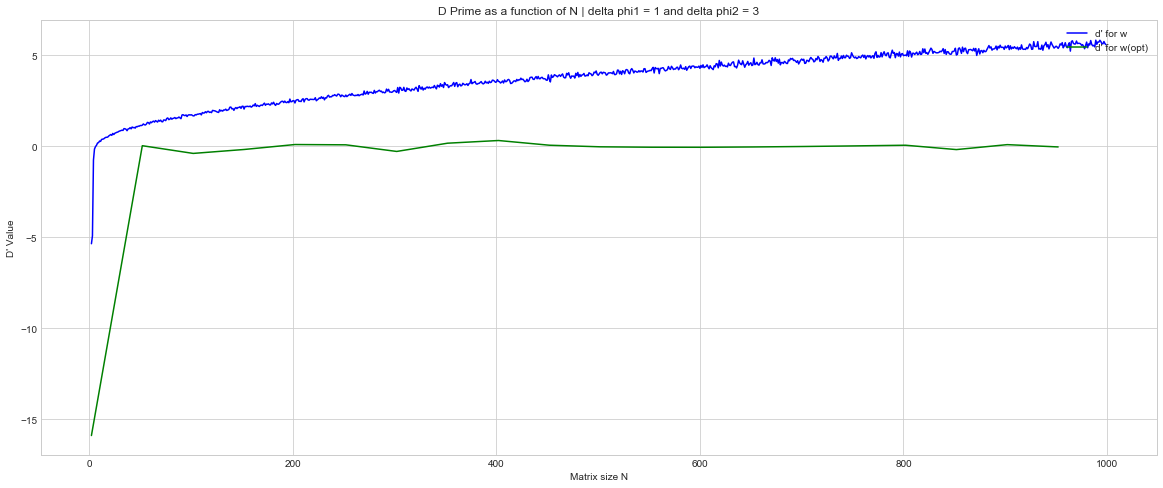

--- 510.32438683509827 seconds ---


In [92]:
start_time = time.time()

dprime_list_b=[]
cmax = 0.2
calc_dprime(cmax)
print(dprime_list_b)


title("D Prime as a function of N | w-opt and w")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_a, 'b', label="d' for w")
plot(range(2, 1000, 50), dprime_list_b, 'g', label="d' for w(opt)" )
legend(loc='upper right')
show()

print("--- %s seconds ---" % (time.time() - start_time))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 [-13.72146404422331, -0.028318678467783978, 0.16396645435566723, 0.11824528972720134, 0.07814721995083855, -0.061359417117484626, -0.24531035822003636, 0.10013658625581881, -0.01648733403396507, -0.16067280162922812, -0.11774340813610194, -0.2909089404782059, -0.2022419674490955, 0.19919893079018983, 0.2478196304504973, 0.16244604046630493, 0.07784061243533066, -0.0436308244202356, -0.001742152814996573, 0.09214123717897366]


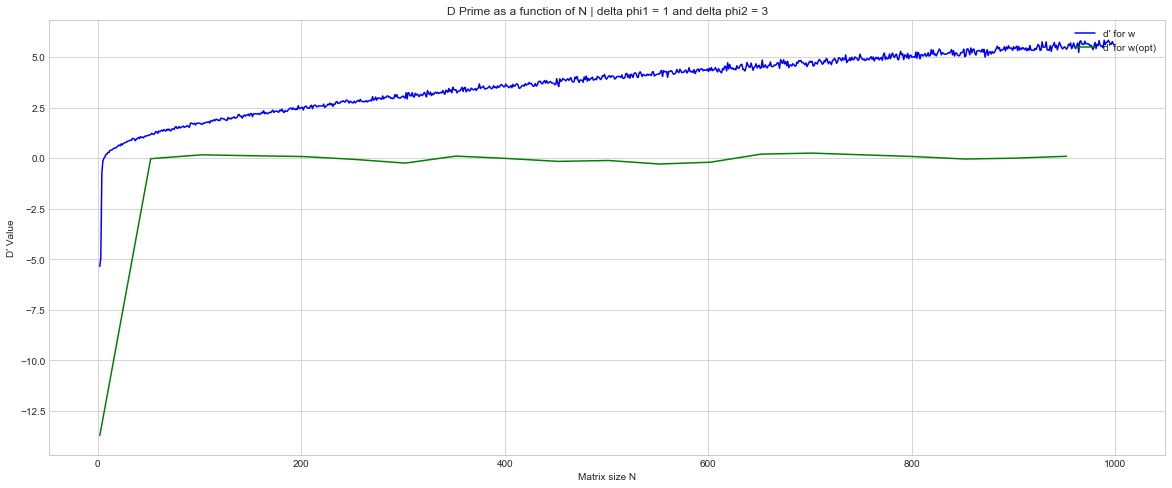

--- 1160.870628118515 seconds ---


In [95]:
start_time = time.time()

dprime_list_b=[]
cmax = 0.3
calc_dprime(cmax)
print(dprime_list_b)

title("D Prime as a function of N | w-opt and w")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_a, 'b', label="d' for w")
plot(range(2, 1000, 50), dprime_list_b, 'g', label="d' for w(opt)" )
legend(loc='upper right')
show()

print("--- %s seconds ---" % (time.time() - start_time))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 [-14.878876190240833, 0.18475103182121844, -0.18670634525458954, -0.21106932683226853, -0.06663935444685357, -0.36471011486237503, 0.17648477108301516, 0.12722375259276536, 0.04196161837397158, -0.04851389180181525, -0.1295347050049301, 0.26276818346498315, 0.4294431561249592, -0.2785425623423291, -0.17252537906180757, -0.19077326306900716, 0.2592388012935369, 0.03343630478694163, -0.24685641996855764, -0.18228087422116204]


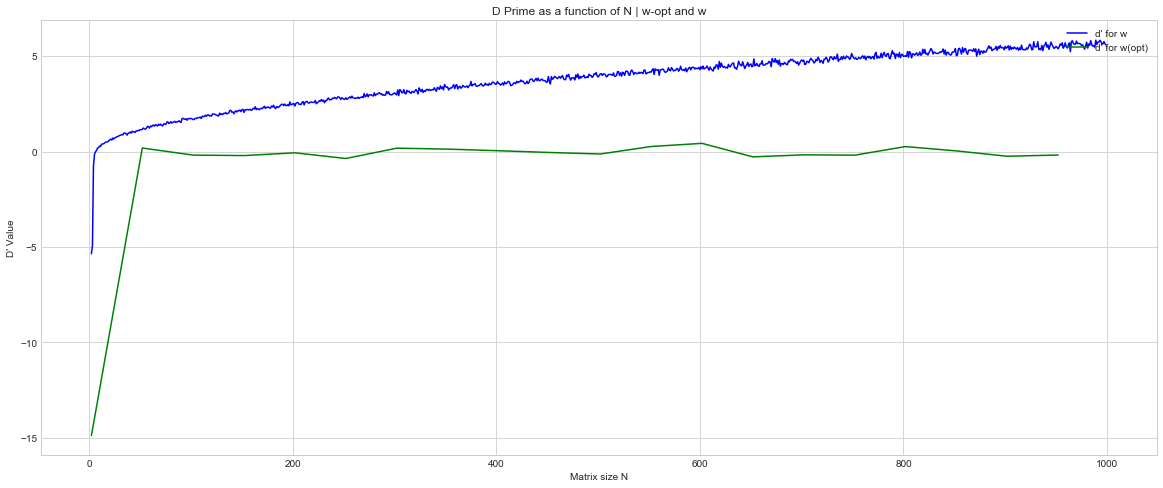

--- 142.3491542339325 seconds ---


In [96]:
start_time = time.time()

dprime_list_b=[]
cmax = 0.4
calc_dprime(cmax)
print(dprime_list_b)


title("D Prime as a function of N | w-opt and w")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_a, 'b', label="d' for w")
plot(range(2, 1000, 50), dprime_list_b, 'g', label="d' for w(opt)" )
legend(loc='upper right')
show()

print("--- %s seconds ---" % (time.time() - start_time))

# Part C
____

In [3]:
# Reset all values
# IMPORTS
%matplotlib inline
import numpy as np
import math, sys
from pylab import *
from tqdm import tqdm
import time
style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = [20, 8]


# Use three sample mus to test it out
# fan0 = var / mu
# pick your own var a few times

# For part c, it is similar to before, execpt we don’t use fixed cappa & f(max).

# Pick a standard deviation, use that to calculate fano factor. Use that to calculate gamma-distribution. 

# Each neuron is going to have a different cappa and fmax.
n=100
k=1
f_max=20
f0=5
phi=1


# method for pop. response f(c, phi) 
# THIS FUNCTION TAKES phi_I AS INPUT TO GENERATE VALUES FOR A SET phi OVER 0 TO PI
def population_response(c, phi_I):
    response = f0 + c* f_max * math.exp(k *( math.cos(2*(math.radians(phi) - phi_I)) - 1) )
    return response

# range
plot_range = np.linspace(0, math.pi, n)

In [4]:
mean1=1.5
mean2=20
var=100

fano=mean1/var
np.random.gamma(mean1/fano, fano)

variance_range= np.linspace(100, 150, 1)

In [227]:
for variance in variance_range:
    
    mean1=1.5
    mean2=20
    var=variance

    fanok=mean1/var
    fanofmax=mean2/var
    
    dprime_list_k=[]
    for n in range(2, 1000):

        k=np.random.gamma(mean1/fanok, fanok)

        plot_range = np.linspace(0, math.pi, n)


        ############################# C
        C= np.zeros((n,n), dtype=float)
        phi=0
        count=0
        for x in plot_range:
            C[count][count] = population_response(1,x) 
            count+=1

        C_inverse=[]
        for x in range(0,n):
            C_inverse.append(C[x] / (C[x][x]**2))

        # convert back to np array
        C_inverse = np.asarray(C_inverse)


        ############################# w
        # find weight variables, but only need one

        # this is f2 which is 100x1 and is constant, f1 changes to represent delta phi
        phi = 1
        f2=[]
        for y in plot_range:
            f2.append(population_response(1, y))
        f2 = np.asarray(f2)    

        # phi for f1 will go from 2 to 6
        delta_phi = list(range(2,7))

        # generate the weights
        w = []
        for x in delta_phi:
            phi=x

            # this will generate f1 which is 100x1
            f1=[]
            for y in plot_range:
                f1.append(population_response(1, y))
            f1 = np.asarray(f1)    

            diff = f1-f2
            w.append( np.matmul(C_inverse, diff) ) 

        w=np.asarray(w)


        ############################# r

        # here I am generating the w's and r's
        f1_list=[]
        for x in delta_phi:
            phi=x

            # this will generate f1 which is 100x1
            f1=[]
            for y in plot_range:
                f1.append(population_response(1, y))
            f1 = np.asarray(f1)
            f1_list.append(f1)

        r_list=[]
        for x in range(0,5):
            r_list.append(np.random.poisson(f1_list[x]))

        w_list=[]
        for x in range(0,5):
            w_list.append(w[x].transpose())


        # create 5 decision variables
        d_list=[]
        for x in range(0,5):
            d_list.append(np.matmul(w_list[x], r_list[x]))



        ############################# generate the two d valules

        # I'm using w[1] and f1_list[1] where the delta phi was 1
        d1=[]
        right_decision=0
        part_5_range= list(range(0,50,1))

        for x in part_5_range:
            d = np.matmul(w[0], np.random.poisson(f1_list[0]))
            # How often was d>0?
            if(d>0):
                right_decision+=1
            d1.append(d)


        # I'm using w[2] and f1_list[2] where the delta phi was 3
        d2=[]
        right_decision=0

        for x in part_5_range:
            d = np.matmul(w[2], np.random.poisson(f1_list[2]))
            # How often was d>0?
            if(d>0):
                right_decision+=1
            d2.append(d)



        ############################# find d' and save it to plot over 2 to 1000
        # d' = a single result, average the positive results from d1 and d2
        def dprime():
            ans = ( mean(d2) - mean(d1)) / math.sqrt(np.var(d1) + np.var(d2))
            return ans

        dprime_list_k.append(dprime())

In [240]:
for variance in variance_range:
    
    mean1=1.5
    mean2=20
    var=variance

    fanok=mean1/var
    fanofmax=mean2/var
    
    dprime_list_f=[]
    for n in range(2, 1000):

        f=np.random.gamma(mean2/fanofmax, fanofmax)

        plot_range = np.linspace(0, math.pi, n)


        ############################# C
        C= np.zeros((n,n), dtype=float)
        phi=0
        count=0
        for x in plot_range:
            C[count][count] = population_response(1,x) 
            count+=1

        C_inverse=[]
        for x in range(0,n):
            C_inverse.append(C[x] / (C[x][x]**2))

        # convert back to np array
        C_inverse = np.asarray(C_inverse)


        ############################# w
        # find weight variables, but only need one

        # this is f2 which is 100x1 and is constant, f1 changes to represent delta phi
        phi = 1
        f2=[]
        for y in plot_range:
            f2.append(population_response(1, y))
        f2 = np.asarray(f2)    

        # phi for f1 will go from 2 to 6
        delta_phi = list(range(2,7))

        # generate the weights
        w = []
        for x in delta_phi:
            phi=x

            # this will generate f1 which is 100x1
            f1=[]
            for y in plot_range:
                f1.append(population_response(1, y))
            f1 = np.asarray(f1)    

            diff = f1-f2
            w.append( np.matmul(C_inverse, diff) ) 

        w=np.asarray(w)


        ############################# r

        # here I am generating the w's and r's
        f1_list=[]
        for x in delta_phi:
            phi=x

            # this will generate f1 which is 100x1
            f1=[]
            for y in plot_range:
                f1.append(population_response(1, y))
            f1 = np.asarray(f1)
            f1_list.append(f1)

        r_list=[]
        for x in range(0,5):
            r_list.append(np.random.poisson(f1_list[x]))

        w_list=[]
        for x in range(0,5):
            w_list.append(w[x].transpose())


        # create 5 decision variables
        d_list=[]
        for x in range(0,5):
            d_list.append(np.matmul(w_list[x], r_list[x]))



        ############################# generate the two d valules

        # I'm using w[1] and f1_list[1] where the delta phi was 1
        d1=[]
        right_decision=0
        part_5_range= list(range(0,50,1))

        for x in part_5_range:
            d = np.matmul(w[0], np.random.poisson(f1_list[0]))
            # How often was d>0?
            if(d>0):
                right_decision+=1
            d1.append(d)


        # I'm using w[2] and f1_list[2] where the delta phi was 3
        d2=[]
        right_decision=0

        for x in part_5_range:
            d = np.matmul(w[2], np.random.poisson(f1_list[2]))
            # How often was d>0?
            if(d>0):
                right_decision+=1
            d2.append(d)



        ############################# find d' and save it to plot over 2 to 1000
        # d' = a single result, average the positive results from d1 and d2
        def dprime():
            ans = ( mean(d2) - mean(d1)) / math.sqrt(np.var(d1) + np.var(d2))
            return ans

        dprime_list_f.append(dprime())

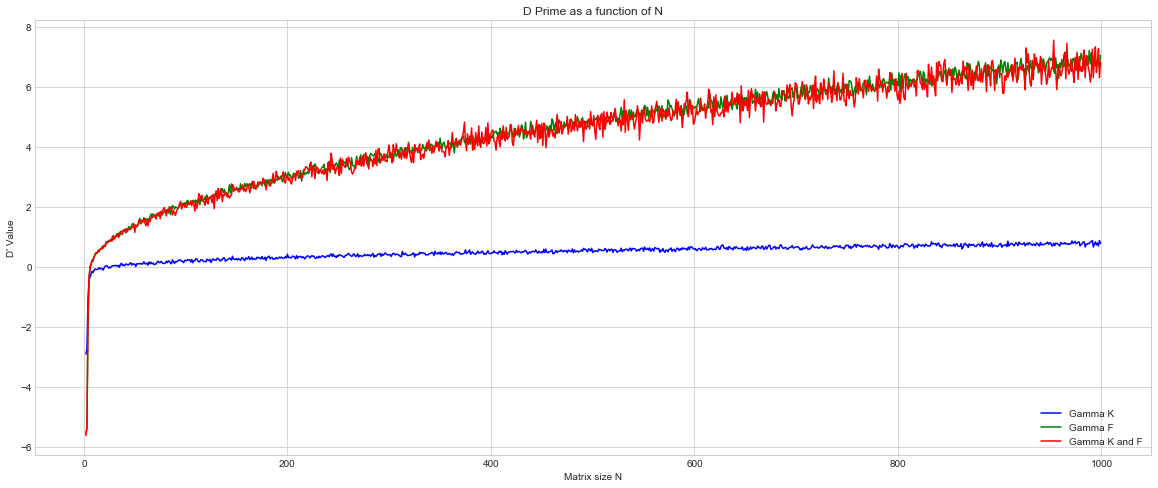

In [245]:
# Plot
title("D Prime as a function of N")
xlabel("Matrix size N")
ylabel("D' Value")
plot(range(2, 1000), dprime_list_k, 'b', label="Gamma K")
plot(range(2, 1000), dprime_list_f, 'g', label="Gamma F")
legend(loc='lower right')
show()


# Part D
____

### Part A)

For part A, we can see that C determines the height or strength of the population response.
As phi determines the horizontal orientation of the population response.

In terms of delta phi, an increase from delta phi of 1 to 3 increased the number of correct responses from 981 to 998 out of 1000 trials. 

We can also see from the histogram that a difference in delta phi's affects the width of the distribution of values in d over 1000 trials.

For d', we can see that an increase of the number of neurons from 2 to 1000 also showed an increase in the value of d'. This means an increase in the number of neurons results in an increase of percent correct.

K is positively correlated with d' as well. When k rose from 0.5 to 10, d' increased as well. Higher K means higher percent correct.

### Part B)

Part B is similar to Part A except now we are using an optimal covariance matrix.

The covariance matrix is now completely filled and we apply noise using a Gausiann distribution which takes into consideration both f and C_inverse when generating r.

For varying values of Cmax, the d' for w-opt is much lower compared to the d' of just w. Thus, percent correct is lower when using w-opt. The d' for w-opt hangs around 0, but I believe it is the correct shape.

Varing Cmax does not change d' of w-opt. My d' for w-opt is rather low, but increasing cmax by larger intervals may show more of a difference and having a larger delta phi may also increase the value of d'.

### Part C)

For Part C, I went back to Part A. D1 and D2 are calculated using w and r where r is poiss(f()). The only that that I am varying is k and fmax.

When fmax is drawn from a Gamma distribution, it slightly increases the slope of the d' line drawn.

When k is drawn from a Gamma distribution, the exact opposite happens, the slope of the d' line is decreased and the d' values are lower overall.

Drawing both from a Gamma distribution results in a similar plot to only drawing fmax from a Gamma Distribution.